**непараметрическая регрессия**

Евгений Борисов esborisov@sevsu.ru

In [1]:
import numpy as np
from numpy import random as rng
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=2)

---

In [3]:
# генерируем набор данных
n_samples=500
X = np.linspace(-1,2,n_samples).reshape(-1,1)
y = np.sin(X*2.9)+np.cos(X*5.9)+rng.rand(n_samples).reshape(-1,1)
X.shape,y.shape

((500, 1), (500, 1))

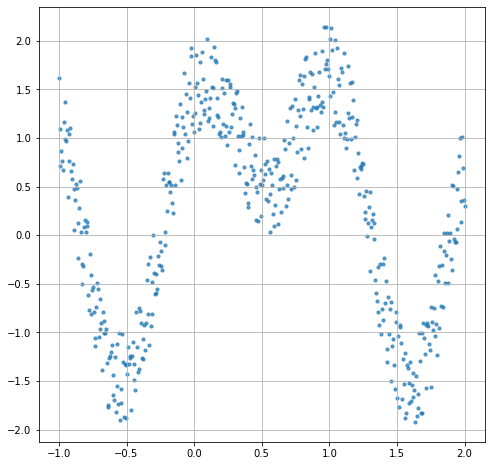

In [4]:
# рисуем исходные данные
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter( x=X, y=y, s=10, alpha=0.7 ) # точки учебного набора
plt.grid()
plt.show()


---

непараметрическая регрессия, формула Надарая-Ватсона

$$ 
a(x,X,y) = \frac 
 { \sum\limits_{i=1}^m y_i K\left(\frac{\rho(x,x_i)}{h}\right) }
 { \sum\limits_{i=1}^m K\left(\frac{\rho(x,x_i)}{h}\right) } 
$$

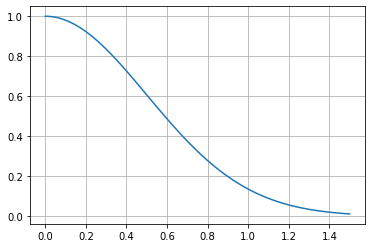

In [5]:
# # прямоугольное ядро
# def K(x): return np.abs(x)<=1.0

# # треугольное ядро
# def K(x): return (1.0-np.abs(x))*(np.abs(x)<=1.0)

# квадратичное ядро (Епанечникова)
#def K(x): return (1.0-np.square(x))*(np.abs(x)<=1.0)
    
# гауссово ядро
def K(x): return np.exp(-2.0*np.square(x))

x = np.linspace(0.0,1.5,100)
plt.plot(x,K(x))
plt.grid()
plt.show()

---

In [6]:
# точки, для которых будем считать регрессию
n = n_samples//10 # количество
u = np.linspace(X.min(),X.max(),n).reshape(-1,1)
u.shape

(50, 1)

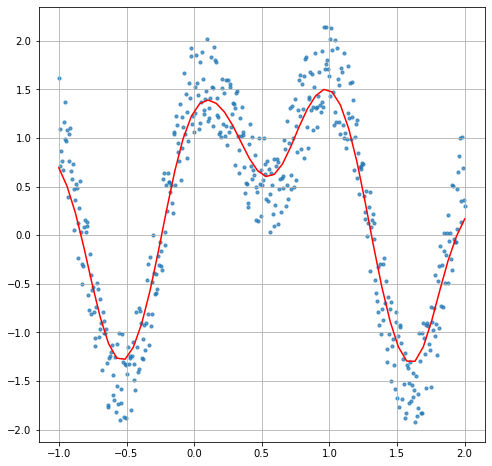

In [7]:
from sklearn.metrics import pairwise_distances

r=pairwise_distances(u,X,metric='euclidean') 
h = .2 # ширина окна, влияет на точность аппроксимации
w = K(r/h) # ядро влияет на на гладкость аппроксимации
z = (y.T*w).sum(axis=1)/w.sum(axis=1) # значение регресии для точки u

# рисуем исходные данные
plt.figure(figsize=(8,8)) # размер картинки
plt.scatter(x=X,y=y,s=10,alpha=0.7) # точки учебного набора
plt.plot(u,z,c='r') # точки учебного набора
plt.grid()
plt.show()

---

**данные для самостоятельных экспериментов**

база данных параметров погоды

In [21]:
# !wget -c https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

--2021-09-19 22:14:35--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
SSL_INIT
Загружен сертификат CA «/etc/ssl/certs/ca-certificates.crt»
Распознаётся s3.amazonaws.com (s3.amazonaws.com)… 52.216.184.37
Подключение к s3.amazonaws.com (s3.amazonaws.com)|52.216.184.37|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 13565642 (13M) [application/zip]
Сохранение в: «jena_climate_2009_2016.csv.zip»

jena_climate_2009_2 100%[===================>]  12,94M   112KB/s    за 90s     

2021-09-19 22:16:06 (147 KB/s) - «jena_climate_2009_2016.csv.zip» сохранён [13565642/13565642]



In [8]:
import pandas as pd
df = pd.read_csv('jena_climate_2009_2016.csv')
print(len(df))

420451


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420451 non-null  object 
 1   p (mbar)         420451 non-null  float64
 2   T (degC)         420451 non-null  float64
 3   Tpot (K)         420451 non-null  float64
 4   Tdew (degC)      420451 non-null  float64
 5   rh (%)           420451 non-null  float64
 6   VPmax (mbar)     420451 non-null  float64
 7   VPact (mbar)     420451 non-null  float64
 8   VPdef (mbar)     420451 non-null  float64
 9   sh (g/kg)        420451 non-null  float64
 10  H2OC (mmol/mol)  420451 non-null  float64
 11  rho (g/m**3)     420451 non-null  float64
 12  wv (m/s)         420451 non-null  float64
 13  max. wv (m/s)    420451 non-null  float64
 14  wd (deg)         420451 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [10]:
%%time

df['Date Time'] = pd.to_datetime(df['Date Time']) # конвертируем дату и время

CPU times: user 1min 46s, sys: 44.9 ms, total: 1min 46s
Wall time: 1min 47s


In [21]:
df.sample(2)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
107458,2011-01-16 06:10:00,998.05,5.57,278.89,2.62,81.2,9.09,7.38,1.71,4.61,7.39,1243.87,1.03,1.80,193.9
167022,2012-04-03 21:30:00,991.31,7.48,281.34,3.85,77.7,10.36,8.05,2.31,5.07,8.12,1226.74,0.82,1.44,91.0


In [11]:
df.describe([.01,.1,.25,.5,.75,.95]).T.drop(columns=['count']) # описание данных

,mean,std,min,1%,10%,25%,50%,75%,95%,max
p (mbar),989.212508,8.359454,913.60,966.890,978.58,984.20,989.57,994.72,1002.49,1015.35
T (degC),9.448567,8.423685,-23.01,-10.090,-1.27,3.36,9.41,15.47,23.15,37.28
Tpot (K),283.491182,8.504820,250.60,263.520,272.67,277.43,283.46,289.53,297.26,311.34
Tdew (degC),4.954011,6.730411,-25.01,-12.725,-3.58,0.24,5.21,10.07,15.14,23.11
rh (%),76.007045,16.477126,12.95,35.130,50.99,65.21,79.30,89.40,97.20,100.00
VPmax (mbar),13.575089,7.739481,0.95,2.830,5.57,7.78,11.82,17.60,28.40,63.77
VPact (mbar),9.532524,4.183895,0.79,2.290,4.69,6.21,8.86,12.35,17.23,28.32
VPdef (mbar),4.042483,4.897270,0.00,0.040,0.36,0.87,2.19,5.30,14.32,46.01
sh (g/kg),6.021630,2.655973,0.50,1.430,2.95,3.92,5.59,7.80,10.92,18.13
H2OC (mmol/mol),9.638982,4.235130,0.80,2.290,4.74,6.29,8.96,12.48,17.44,28.82


In [36]:
# df['wv (m/s)'] = df['wv (m/s)'].apply(lambda x: max(0.,x) ) 
# df['max. wv (m/s)'] = df['max. wv (m/s)'].apply(lambda x: max(0.,x) )

<AxesSubplot:xlabel='Date Time'>

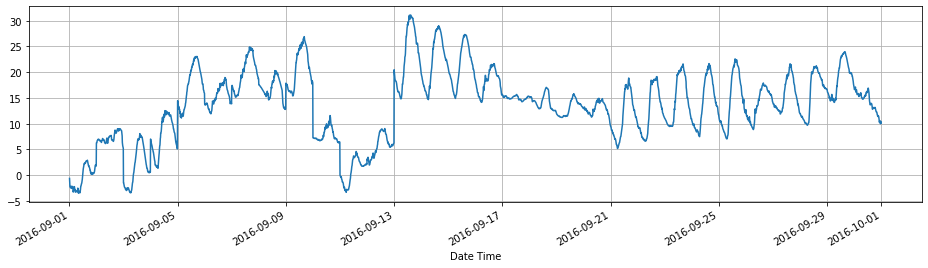

In [26]:
(
df[ (df['Date Time'] > '2016-09-01 00:00:00') & (df['Date Time'] < '2016-10-01 00:00:00') ]
.set_index('Date Time')
['T (degC)']
.plot(figsize=(16,4),grid=True,)
)

In [31]:
# преобразование pandas-таблицы в numpy-матрицу
X = df[ (df['Date Time'] > '2016-09-01 00:00:00') & (df['Date Time'] < '2016-10-01 00:00:00') ]['T (degC)'].values
X.shape

(4319,)